<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Session 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import min-max scaler to perform normalization
from sklearn.preprocessing import MinMaxScaler 

# import various functions from sklearn 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Read the data

Load the csv file and print the first five observations.

In [3]:
# read the data
df_nba = pd.read_csv('nba_data.csv')

# display the first five rows of the data
df_nba.head()

,NAME,GP,FGM,FGA,3PA,FTM,FTA,OREB,DREB,AST,TOV,CAREER_5YRS
0,Brandon Ingram,36,2,7,2,1,2,0,3,1,1,0
1,Andrew Harrison,35,2,6,2,2,3,0,2,3,1,0
2,JaKarr Sampson,74,2,4,1,0,1,0,1,1,1,0
3,Malik Sealy,58,2,5,0,0,1,1,0,0,1,1
4,Matt Geiger,48,1,3,0,1,1,1,1,0,0,1


**The data definition is as follows:** <br>

**NAME:** Name of the basketball player

**GP:** Number of games played 

**FGM:** Number of field goals made 

**FGA:** Number of attempts for a field goal

**3PA:** Number of attempts for 3-point goal 

**FTM:** Number of free throws made

**FTA:** Number of attempts for free throws 

**OREB:** Number of offensive rebounds

**DREB:** Number of defensive rebounds

**AST:** Number of assists

**TOV:** Number of turnovers

**CAREER_5YRS:** Whether the career of a player is more than 5 years or not (0 = career < 5 years, 1 = career >= 5 years) (target/dependent variable)

Our objective is to predict whether the player will last for 5 years in the game or not.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is there any player whose information is recorded more than once? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

To check the duplicate records in the data, use the `duplicated()` method. If there are any duplicates, we remove them from the original data.

In [4]:
# 'duplicated()' returns the boolean output for the duplicate record
# 'value_counts()' returns the count of True and False obtained in the boolean output 
df_nba.duplicated().value_counts()

False    1294
True       19
dtype: int64

The above output shows that 19 records are duplicated. We remove such records using the `drop_duplicates()` method.

In [5]:
# remove the duplicated observation
df_nba = df_nba.drop_duplicates()

# recheck the duplicates
df_nba.duplicated().value_counts()

False    1294
dtype: int64

**Interpretation:** The above output shows that there is no duplicated row in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Identify and remove the variables in the data which are insignificant for the classification analysis</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# print the variable names in the data
df_nba.columns

Index(['NAME', 'GP', 'FGM', 'FGA', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'AST',
       'TOV', 'CAREER_5YRS'],
      dtype='object')

We can see that the variables from `GP`, `FGM`, to `TOV` represents the statistics about the player's game and the variable `CAREER_5YRS` is the target variable. Thus, these variables can be significant for the analysis.

But, the variable `NAME` represents the name of each player, which is redundant for the further analysis and thus, we drop this column. 

In [7]:
# drop the column 'NAME' using drop()
# 'axis = 1' drops the specified column
df_nba = df_nba.drop('NAME', axis = 1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any outliers present in the data? If yes, remove such observations using the quartiles of the variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Split the dependent and independent variables.

In [8]:
# split the target and independent variables
# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'CAREER_5YRS' using drop()
# 'axis = 1' drops the specified column
df_feature = df_nba.drop('CAREER_5YRS', axis=1)

# store the target variable 'CAREER_5YRS' in a dataframe 'df_target'
df_target = df_nba['CAREER_5YRS']

#### Plot a boxplot to visualize the outliers in all the independent variables.

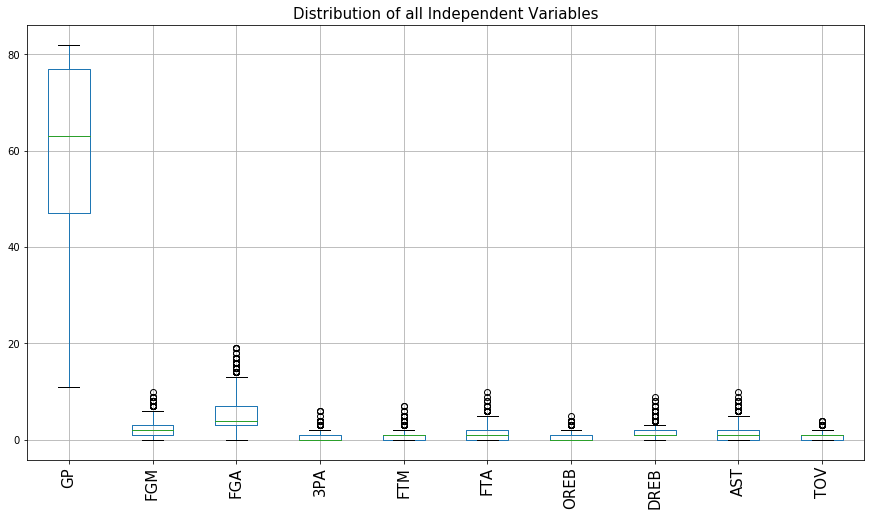

In [9]:
# plot a boxplot to visualize the outliers in all the independent variables
df_feature.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
# set text size using 'fontsize'
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

From the above plot, we notice that all the variables except `GP` have outliers. Now, use the IQR method to remove the outliers. 

In [10]:
# calculate the first quartile
Q1 = df_feature.quantile(0.25)

# calculate the third quartile
Q3 = df_feature.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (the rows represent outliers in the data)
df_nba = df_nba[~((df_nba < (Q1 - 1.5 * IQR)) | (df_nba > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
df_nba = df_nba.reset_index(drop = True)

# check the shape of the data
df_nba.shape

(1054, 11)

**Interpretation:**  From the above output, we can see that the dimension of the data is reduced which implies that the outliers are removed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is scaling required for the KNN algorithm? If yes, scale the data such that the range of each variable will be equal to 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

As KNN is the distance-based algorithm, it uses different distance metrics to identify the nearest points for the given data point. If we apply KNN on the unscaled data, the variable with higher values (in our case, the variable `GP`) will dominate the other variables. Thus, we scale the independent variables before applying the KNN algorithm.

#### Split the dependent and independent variables.

In [11]:
# split the target and independent variables
# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'CAREER_5YRS' using drop()
# 'axis = 1' drops the specified column
df_feature = df_nba.drop('CAREER_5YRS', axis=1)

# store the target variable 'CAREER_5YRS' in a dataframe 'df_target'
df_target = df_nba['CAREER_5YRS']

In [12]:
# initialize the MinMaxScaler
X_scaler = MinMaxScaler()

# consider the dataframe 'df_feature' obtained in Q3
# scale all the independent variables
num_scaled = X_scaler.fit_transform(df_feature)

# create a dataframe of scaled variables
# pass the required column names to the parameter 'columns'
df_feature_scaled = pd.DataFrame(num_scaled, columns = df_feature.columns)

# check the range of each variable
print('Range: \n', df_feature_scaled.max() - df_feature_scaled.min())

Range: 
 GP     1.000000
FGM    1.000000
FGA    1.000000
3PA    1.000000
FTM    1.000000
FTA    1.000000
OREB   1.000000
DREB   1.000000
AST    1.000000
TOV    1.000000
dtype: float64


**Interpretation:** The above output shows that all the independent variables have range 1.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a 7-NN model on 70% of the data using the 'Chebyshev' distance and find its accuracy 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Split the data in the train and test set.

In [13]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(df_feature_scaled, df_target, 
                                                                                random_state = 1, test_size = 0.3)

#### Build a KNN model with K = 7 on the train set using 'chebyshev' distance metric.

In [14]:
# instantiate the 'KNeighborsClassifier' 
# n_neighnors: number of neighbors to consider
# 'metric = chebyshev' considers the chebyshev distance to find the nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'chebyshev')

# fit the model using fit() on train data
knn_model = knn.fit(X_train_scaled, y_train_scaled)

#### Calculate the accuracy of the knn_model.

In [15]:
# predict the target values
y_pred = knn_model.predict(X_test_scaled)

# calculate the accuracy
print('Accuracy:', accuracy_score(y_test_scaled, y_pred))

Accuracy: 0.6498422712933754


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the best value of 'K' for the KNN model from the given list of values (use 5-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

K = [3, 5, 7, 9, 11, 13]

Consider the train and test set in Q5.

In [16]:
# given list of values
K = [3, 5, 7, 9, 11, 13]

# create a dictionary with hyperparameter and its values
# pass a list of values to 'n_neighbors' to build the KNN model using different values of K
tuned_paramaters = [{'n_neighbors': K}]
 
# instantiate the 'KNeighborsClassifier'
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
knn_grid = GridSearchCV(estimator = knn, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
knn_grid_model = knn_grid.fit(X_train_scaled, y_train_scaled)

# get the best parameters
print('Best value of K: ', knn_grid_model.best_params_, '\n')

Best value of K:  {'n_neighbors': 7} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which distance metric among 'manhattan', 'euclidean' and 'chebyshev' is suitable for the given dataset? (consider K = 19)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# create a dictionary with hyperparameters and its values
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'metric': ['euclidean', 'manhattan', 'Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
# pass the required value of k to the parameter, 'n_neighbors'
knn = KNeighborsClassifier(n_neighbors = 19)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
knn_grid = GridSearchCV(estimator = knn, 
                        param_grid = tuned_paramaters, 
                        cv = 5)

# fit the model on train data using fit()
knn_grid.fit(X_train_scaled, y_train_scaled)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean'} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Find the euclidean distance between the first observation of the dataframe 'X_test_scaled' and its five neighboring points in the train set (use for loop)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# consider the first observation in the dataframe 'X_test_scaled'
test_pt = X_test_scaled.iloc[0,:]

# calculate the euclidean distance between the 'test_pt' and all the points in the train set
# create an empty list 'd' to store all distance between the 'test_pt' and all the points in the train set
d = []

# use for loop to consider each data point in the train set
for i in X_train_scaled.index:
    sum = 0
    
    # use for loop to access each element in a observation
    for j in range(len(X_test_scaled.iloc[0,:])):
        
        # calculate the squared euclidean distance
        sum = sum + (X_test_scaled.iloc[0,:][j] - X_train_scaled.loc[i][j])**2
    
    # take the square root of 'sum' to get the euclidean distance 
    distance = sum ** (1/2)
    
    # append the result to the list 'd'
    d.append(distance)    

In [22]:
# sort the list 'd' in ascending order to get the neighboring points
# by default, sort() sorts the list in ascending order
d.sort()

# print first five distance values
print(d[0:5])

[0.21203616074995849, 0.2153853087213283, 0.21840906531305704, 0.2644245331597119, 0.2644245331597119]


**Interpretation:** The first five distance values in the sorted list corresponds to the euclidean distance between the first test data point and its 5 neighboring points.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the parameters obtained in Q7 to build the KNN model, and find the number of false predictions using the test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Build a model on a training dataset using euclidean distance and K = 19.

In [23]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# 'metric = euclidean' considers the euclidean distance to find the nearest neighbors
knn_classification = KNeighborsClassifier(n_neighbors = 19, metric = 'euclidean')

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train_scaled, y_train_scaled)

#### Build a confusion matrix to find the number of false predictions.

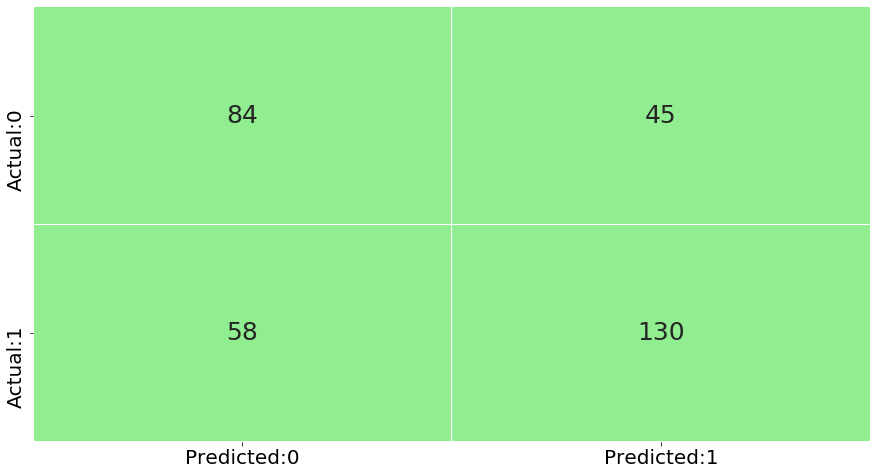

In [24]:
# predict the target values using X_test
y_pred = knn_model.predict(X_test_scaled)

# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test_scaled, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightgreen']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Interpretation:** The off-diagonal entries in the confusion matrix returns the count of false predictions made by the model on the test set. Here, 103 observations out of 317 are wrongly predicted.